In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import ast
import numpy as np

# Load the dataset
df= pd.read_csv('brgoch_superhard_training.csv')
#X= pd.read_csv('matminer_X.csv')
#y= pd.read_csv('matminer_y.csv')


# Handle missing values (you might want to use imputation or drop rows with missing values)
#import pandas as pd
#
# Assuming df is your original DataFrame

# Initialize an empty list to store dictionaries
feature_dicts = []

# Loop through each row in the 'brgoch_feats' column
for index, row in df.iterrows():
    string_data = row['brgoch_feats']
    data_dict = ast.literal_eval(string_data)
    feature_dicts.append(data_dict)

# Create a DataFrame from the list of dictionaries
df_features = pd.DataFrame(feature_dicts)

# Transpose the DataFrame for a more readable format (optional)


# Print the DataFrame

df_features['composition'] = df['composition']


In [133]:
df_features

,atomic_number_feat_1,atomic_number_feat_2,atomic_number_feat_3,atomic_number_feat_4,atomic_weight_feat_1,atomic_weight_feat_2,atomic_weight_feat_3,atomic_weight_feat_4,period_number_feat_1,period_number_feat_2,...,polar_axis,reduced_volume,density,anisotropy,electron_density,volume_per_atom,valence_electron_density,Gilman_electron_density,outer_shell_electron_density,composition
0,123.500000,221,13,78,306.110770,558.258461,26.981539,195.08000,10.500000,15,...,0,57.83,17.58,1.000000,0.224799,14.457360,0.899196,0.415014,0.276676,Al1 Pt3
1,45.500000,9,25,41,101.391240,16.969720,54.938050,92.90638,6.500000,3,...,0,152.07,8.86,0.771965,0.315737,12.668777,0.947211,0.631474,0.236803,Mn2 Nb1
2,44.000000,56,8,72,105.244400,146.491200,15.999400,178.49000,5.000000,2,...,0,141.13,9.91,0.976440,0.283521,11.756914,0.850563,0.680451,0.680451,Hf1 O2
3,82.500000,9,29,78,192.859000,4.442000,63.546000,195.08000,9.000000,6,...,0,48.27,13.27,1.000000,0.435072,12.066970,1.740288,0.414354,0.165742,Cu3 Pt1
4,57.000000,42,12,78,133.997500,122.165000,24.305000,195.08000,7.500000,3,...,1,450.98,5.92,0.966857,0.159631,18.793352,0.638524,0.266052,0.159631,Mg3 Pt1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,145.000000,378,12,78,358.208863,951.095000,24.305000,195.08000,12.333333,27,...,0,105.44,16.93,0.711953,0.161283,15.057811,1.128982,0.664107,0.531286,Mg1 As1 Pt5
2570,26.666667,33,6,39,60.273617,76.894850,12.011000,88.90585,3.666667,3,...,0,127.63,4.71,0.540494,0.219604,21.250326,0.658813,0.564697,0.611755,Y1 C1 Br1
2571,16.333333,6,8,22,34.289523,15.881200,15.999400,47.88000,3.666667,0,...,0,43.73,3.91,0.458680,0.251784,10.922076,1.007135,0.824019,0.824019,Na1 Ti1 O2
2572,27.333333,15,19,34,60.534767,39.861700,39.098300,78.96000,4.000000,0,...,0,144.35,4.18,0.625404,0.249496,24.048492,0.748488,0.374244,0.332661,K1 Cu1 Se1


In [134]:
df_features['bulk_modulus'] = df['bulk_modulus']
df_features['shear_modulus'] = df['shear_modulus']

In [135]:
X = df_features
y_bulk_modulus = df_features['bulk_modulus']
y_shear_modulus = df_features['shear_modulus']

In [136]:
X = df_features.drop(['bulk_modulus','composition','shear_modulus'], axis=1)
X

,atomic_number_feat_1,atomic_number_feat_2,atomic_number_feat_3,atomic_number_feat_4,atomic_weight_feat_1,atomic_weight_feat_2,atomic_weight_feat_3,atomic_weight_feat_4,period_number_feat_1,period_number_feat_2,...,inversion_centre,polar_axis,reduced_volume,density,anisotropy,electron_density,volume_per_atom,valence_electron_density,Gilman_electron_density,outer_shell_electron_density
0,123.500000,221,13,78,306.110770,558.258461,26.981539,195.08000,10.500000,15,...,1,0,57.83,17.58,1.000000,0.224799,14.457360,0.899196,0.415014,0.276676
1,45.500000,9,25,41,101.391240,16.969720,54.938050,92.90638,6.500000,3,...,1,0,152.07,8.86,0.771965,0.315737,12.668777,0.947211,0.631474,0.236803
2,44.000000,56,8,72,105.244400,146.491200,15.999400,178.49000,5.000000,2,...,1,0,141.13,9.91,0.976440,0.283521,11.756914,0.850563,0.680451,0.680451
3,82.500000,9,29,78,192.859000,4.442000,63.546000,195.08000,9.000000,6,...,1,0,48.27,13.27,1.000000,0.435072,12.066970,1.740288,0.414354,0.165742
4,57.000000,42,12,78,133.997500,122.165000,24.305000,195.08000,7.500000,3,...,0,1,450.98,5.92,0.966857,0.159631,18.793352,0.638524,0.266052,0.159631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,145.000000,378,12,78,358.208863,951.095000,24.305000,195.08000,12.333333,27,...,1,0,105.44,16.93,0.711953,0.161283,15.057811,1.128982,0.664107,0.531286
2570,26.666667,33,6,39,60.273617,76.894850,12.011000,88.90585,3.666667,3,...,1,0,127.63,4.71,0.540494,0.219604,21.250326,0.658813,0.564697,0.611755
2571,16.333333,6,8,22,34.289523,15.881200,15.999400,47.88000,3.666667,0,...,1,0,43.73,3.91,0.458680,0.251784,10.922076,1.007135,0.824019,0.824019
2572,27.333333,15,19,34,60.534767,39.861700,39.098300,78.96000,4.000000,0,...,1,0,144.35,4.18,0.625404,0.249496,24.048492,0.748488,0.374244,0.332661


In [137]:
def my_scorer(regressor,y_test,y_train):
    """
    Score a given regressor on both train and test datasets,
    calculate metrics (RMSE, MAE, R2)
    and plot true-vs-predicted values.
    
    Parameters:
    -----------
    regressor - a sklearn-compatible regressor that has .predict method
    
    """
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    print("Train data:")
    print("RMSE = ",np.sqrt(mean_squared_error(y_train,pred_train)))
    print("MAE = ",mean_absolute_error(y_train,pred_train))
    print("R2 = ",r2_score(y_train,pred_train))
    
    print("Test data:")
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,pred_test)))
    print("MAE = ",mean_absolute_error(y_test,pred_test))
    print("R2 = ",r2_score(y_test,pred_test))

    plt.scatter(y_train,pred_train,label="train",color="blue", alpha=0.1)
    plt.scatter(y_test,pred_test,label="test",color="green", alpha=0.1)
    plt.plot([30,80],[30,80])
    plt.legend()
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.show()
    

# Linear Regression

Bulk modulus

Bulk Modulus  : Mean Squared Error: 22.948643575469454
Bulk Modulus  : R-squared (R2) Score: 0.8921722947720516


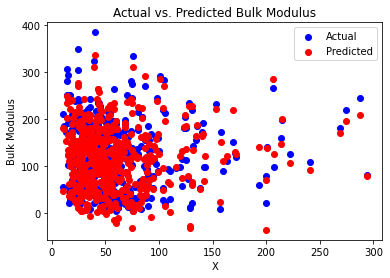

Train data:
RMSE =  21.477608387935607
MAE =  15.197775841958137
R2 =  0.9093312339161331
Test data:
RMSE =  22.948643575469454
MAE =  16.712729946019618
R2 =  0.8921722947720516


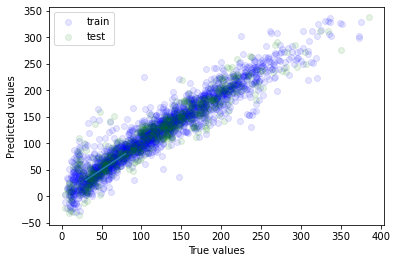

In [138]:
X_train, X_test, y_bulk_train, y_bulk_test = train_test_split(X, y_bulk_modulus, test_size=0.2, random_state=59)

# Initialize and train regressor models
bulk_modulus_regressor = LinearRegression()

bulk_modulus_regressor.fit(X_train, y_bulk_train)

# Evaluate the models
y_bulk_pred = bulk_modulus_regressor.predict(X_test)

bulk_modulus_mse = mean_squared_error(y_bulk_test, y_bulk_pred)
bulk_modulus_rmse = np.sqrt(bulk_modulus_mse)
print(f'Bulk Modulus  : Mean Squared Error: {bulk_modulus_rmse}')


from sklearn.metrics import r2_score

r2 = r2_score(y_bulk_test, y_bulk_pred)
print(f'Bulk Modulus  : R-squared (R2) Score: {r2}')


X1 = X_test.iloc[:, 0]
import numpy as np

X1_array = X1.values

X1_array

import matplotlib.pyplot as plt

plt.scatter(X1_array, y_bulk_test, label='Actual', color='blue')
plt.scatter(X1_array, y_bulk_pred, label='Predicted', color='red')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Bulk Modulus')
plt.title('Actual vs. Predicted Bulk Modulus')

# Add legend
plt.legend()

# Show the plot
plt.show()
my_scorer(bulk_modulus_regressor,y_bulk_test,y_bulk_train)

=======================================================================================

Shear modulus

shear Modulus  : Mean Squared Error: 20.683814413701
shear Modulus  : R-squared (R2) Score: 0.7377490294225515


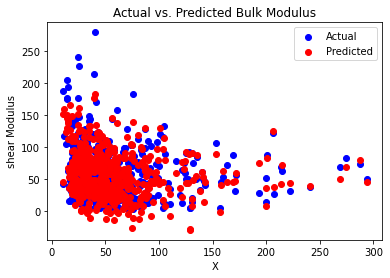

Train data:
RMSE =  19.86306234848626
MAE =  14.174281422843476
R2 =  0.7749837960459087
Test data:
RMSE =  20.683814413701
MAE =  14.90108783260055
R2 =  0.7377490294225515


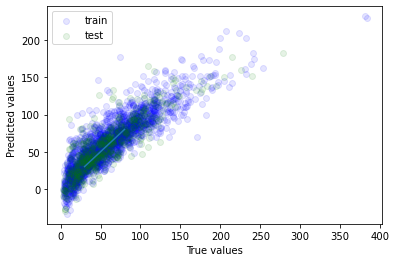

In [139]:
# Shear modulus

X_train, X_test, y_shear_train, y_shear_test = train_test_split(X , y_shear_modulus, test_size=0.2, random_state=59)

# Initialize and train regressor models
shear_modulus_regressor = LinearRegression()

shear_modulus_regressor.fit(X_train, y_shear_train)

# Evaluate the models
y_shear_pred = shear_modulus_regressor.predict(X_test)

shear_modulus_mse = mean_squared_error(y_shear_test, y_shear_pred)
shear_modulus_rmse = np.sqrt(shear_modulus_mse)
print(f'shear Modulus  : Mean Squared Error: {shear_modulus_rmse}')


from sklearn.metrics import r2_score

r2 = r2_score(y_shear_test, y_shear_pred)
print(f'shear Modulus  : R-squared (R2) Score: {r2}')


X1 = X_test.iloc[:, 0]
import numpy as np

X1_array = X1.values

X1_array

import matplotlib.pyplot as plt

plt.scatter(X1_array, y_shear_test, label='Actual', color='blue')
plt.scatter(X1_array, y_shear_pred, label='Predicted', color='red')

# Add labels and title
plt.xlabel('X')
plt.ylabel('shear Modulus')
plt.title('Actual vs. Predicted Bulk Modulus')

# Add legend
plt.legend()

# Show the plot
plt.show()

my_scorer(shear_modulus_regressor,y_shear_test,y_shear_train)

# Random forest  

In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)

bulk Modulus  : Mean Squared Error: 18.752596234191735
bulk Modulus  : R-squared (R2) Score: 0.927998900768791
None
Train data:
RMSE =  7.781499782201733
MAE =  4.9131709723076815
R2 =  0.9880982044433574
Test data:
RMSE =  18.752596234191735
MAE =  12.23288019901853
R2 =  0.927998900768791


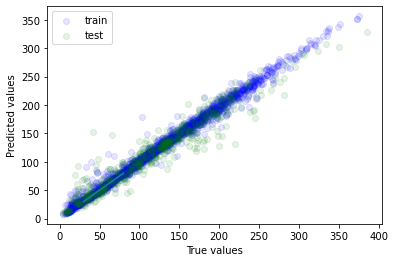

In [174]:
rf.fit(X_train, y_bulk_train)

y_bulk_pred = rf.predict(X_test)

r2_bulk = r2_score(y_bulk_test, y_bulk_pred)

bulk_modulus_mse = mean_squared_error(y_bulk_test, y_bulk_pred)
bulk_modulus_rmse = np.sqrt(bulk_modulus_mse)
print(f'bulk Modulus  : Mean Squared Error: {bulk_modulus_rmse}')
print(print(f'bulk Modulus  : R-squared (R2) Score: {r2_bulk}'))

my_scorer(rf,y_bulk_test,y_bulk_train)


In [142]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_bulk_test, y_bulk_pred)
print('training RMSE = {:.3f}'.format(np.sqrt(mse)))

training RMSE = 18.866


In [143]:
y_Bulk_pred = rf.predict(X)

In [144]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_bulk_modulus, y_Bulk_pred)
print('training RMSE = {:.3f}'.format(np.sqrt(mse)))

training RMSE = 10.925


In [145]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [146]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y_bulk_modulus, scoring='neg_mean_squared_error', cv=kfold)

rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f}'.format(np.mean(rmse_scores)))

Mean RMSE: 19.338


In [147]:
from sklearn.model_selection import cross_val_predict

y_Bulk_pred = cross_val_predict(rf, X, y_bulk_modulus, cv=kfold)

df_features["bulk_modulus_predicted"] = y_Bulk_pred
df_features["B_percentage_error"] = (df_features["bulk_modulus"] - df_features["bulk_modulus_predicted"]).abs()/df_features["bulk_modulus"] * 100

df_features

,atomic_number_feat_1,atomic_number_feat_2,atomic_number_feat_3,atomic_number_feat_4,atomic_weight_feat_1,atomic_weight_feat_2,atomic_weight_feat_3,atomic_weight_feat_4,period_number_feat_1,period_number_feat_2,...,electron_density,volume_per_atom,valence_electron_density,Gilman_electron_density,outer_shell_electron_density,composition,bulk_modulus,shear_modulus,bulk_modulus_predicted,B_percentage_error
0,123.500000,221,13,78,306.110770,558.258461,26.981539,195.08000,10.500000,15,...,0.224799,14.457360,0.899196,0.415014,0.276676,Al1 Pt3,225.230461,91.197748,211.718137,5.999333
1,45.500000,9,25,41,101.391240,16.969720,54.938050,92.90638,6.500000,3,...,0.315737,12.668777,0.947211,0.631474,0.236803,Mn2 Nb1,232.696340,74.590157,218.117146,6.265330
2,44.000000,56,8,72,105.244400,146.491200,15.999400,178.49000,5.000000,2,...,0.283521,11.756914,0.850563,0.680451,0.680451,Hf1 O2,204.573433,98.564374,196.170982,4.107303
3,82.500000,9,29,78,192.859000,4.442000,63.546000,195.08000,9.000000,6,...,0.435072,12.066970,1.740288,0.414354,0.165742,Cu3 Pt1,159.312640,51.778816,152.875213,4.040751
4,57.000000,42,12,78,133.997500,122.165000,24.305000,195.08000,7.500000,3,...,0.159631,18.793352,0.638524,0.266052,0.159631,Mg3 Pt1,69.637565,27.588765,69.641025,0.004969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,145.000000,378,12,78,358.208863,951.095000,24.305000,195.08000,12.333333,27,...,0.161283,15.057811,1.128982,0.664107,0.531286,Mg1 As1 Pt5,181.857661,70.362793,164.010044,9.814058
2570,26.666667,33,6,39,60.273617,76.894850,12.011000,88.90585,3.666667,3,...,0.219604,21.250326,0.658813,0.564697,0.611755,Y1 C1 Br1,22.970769,9.733656,31.193564,35.796775
2571,16.333333,6,8,22,34.289523,15.881200,15.999400,47.88000,3.666667,0,...,0.251784,10.922076,1.007135,0.824019,0.824019,Na1 Ti1 O2,98.358957,70.565034,107.671982,9.468406
2572,27.333333,15,19,34,60.534767,39.861700,39.098300,78.96000,4.000000,0,...,0.249496,24.048492,0.748488,0.374244,0.332661,K1 Cu1 Se1,34.111565,21.586576,37.564800,10.123354


___________________________________________________________________________________________________________________

Shear moduls

In [148]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20,n_estimators=60, random_state=4)

In [149]:
rf.fit(X_train, y_shear_train)

y_shear_pred = rf.predict(X_test)

r2_shear = r2_score(y_shear_test, y_shear_pred)

shear_modulus_mse = mean_squared_error(y_shear_test, y_shear_pred)
shear_modulus_rmse = np.sqrt(shear_modulus_mse)
print(f'shear Modulus        : Mean Squared Error: {shear_modulus_rmse}')
print(print(f'shear Modulus  : R-squared (R2) Score: {r2_shear}'))

shear Modulus        : Mean Squared Error: 15.942849620027475
shear Modulus  : R-squared (R2) Score: 0.8441927226019066
None


In [150]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_shear_test, y_shear_pred)
print('training RMSE = {:.3f}'.format(np.sqrt(mse)))

training RMSE = 15.943


In [151]:
y_shear_pred = rf.predict(X)

In [152]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_shear_modulus, y_shear_pred)
print('training RMSE = {:.3f}'.format(np.sqrt(mse)))

training RMSE = 9.278


In [153]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y_shear_modulus, scoring='neg_mean_squared_error', cv=kfold)

rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f}'.format(np.mean(rmse_scores)))

Mean RMSE: 16.715


In [155]:
from sklearn.model_selection import cross_val_predict

y_shear_pred = cross_val_predict(rf, X, y_shear_modulus, cv=kfold)

df_features["shear_modulus_predicted"] = y_shear_pred
df_features["S_percentage_error"] = (df_features["shear_modulus"] - df_features["shear_modulus_predicted"]).abs()/df_features["shear_modulus"] * 100

df_features

,atomic_number_feat_1,atomic_number_feat_2,atomic_number_feat_3,atomic_number_feat_4,atomic_weight_feat_1,atomic_weight_feat_2,atomic_weight_feat_3,atomic_weight_feat_4,period_number_feat_1,period_number_feat_2,...,valence_electron_density,Gilman_electron_density,outer_shell_electron_density,composition,bulk_modulus,shear_modulus,bulk_modulus_predicted,B_percentage_error,shear_modulus_predicted,S_percentage_error
0,123.500000,221,13,78,306.110770,558.258461,26.981539,195.08000,10.500000,15,...,0.899196,0.415014,0.276676,Al1 Pt3,225.230461,91.197748,211.718137,5.999333,81.090833,11.082417
1,45.500000,9,25,41,101.391240,16.969720,54.938050,92.90638,6.500000,3,...,0.947211,0.631474,0.236803,Mn2 Nb1,232.696340,74.590157,218.117146,6.265330,86.313301,15.716743
2,44.000000,56,8,72,105.244400,146.491200,15.999400,178.49000,5.000000,2,...,0.850563,0.680451,0.680451,Hf1 O2,204.573433,98.564374,196.170982,4.107303,94.224677,4.402906
3,82.500000,9,29,78,192.859000,4.442000,63.546000,195.08000,9.000000,6,...,1.740288,0.414354,0.165742,Cu3 Pt1,159.312640,51.778816,152.875213,4.040751,54.941559,6.108178
4,57.000000,42,12,78,133.997500,122.165000,24.305000,195.08000,7.500000,3,...,0.638524,0.266052,0.159631,Mg3 Pt1,69.637565,27.588765,69.641025,0.004969,32.509017,17.834259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,145.000000,378,12,78,358.208863,951.095000,24.305000,195.08000,12.333333,27,...,1.128982,0.664107,0.531286,Mg1 As1 Pt5,181.857661,70.362793,164.010044,9.814058,58.865791,16.339604
2570,26.666667,33,6,39,60.273617,76.894850,12.011000,88.90585,3.666667,3,...,0.658813,0.564697,0.611755,Y1 C1 Br1,22.970769,9.733656,31.193564,35.796775,17.667372,81.508085
2571,16.333333,6,8,22,34.289523,15.881200,15.999400,47.88000,3.666667,0,...,1.007135,0.824019,0.824019,Na1 Ti1 O2,98.358957,70.565034,107.671982,9.468406,68.041673,3.575937
2572,27.333333,15,19,34,60.534767,39.861700,39.098300,78.96000,4.000000,0,...,0.748488,0.374244,0.332661,K1 Cu1 Se1,34.111565,21.586576,37.564800,10.123354,20.716566,4.030332


### hyper optimizan using Random serche

CPU times: user 3min 44s, sys: 0 ns, total: 3min 44s
Wall time: 3min 44s


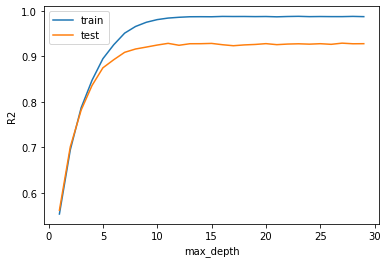

In [156]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform
X_train, X_test, y_shear_train, y_shear_test = train_test_split(X , y_shear_modulus, test_size=0.2, random_state=59)

# Define the hyperparameter grid
def train_test_r2_metrics(regressor):
    """
    Score a given regressor on both train and test datasets and
    calculate R2 metrics.
    

    Parameters:
    -----------
      regressor - a sklearn-compatible regressor that has .predict method
      
    Returns:
    --------
        r2_train, r2_test
    """
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)    
    r2_train=r2_score(y_bulk_train,pred_train)
    r2_test = r2_score(y_bulk_test,pred_test)    
    return r2_train,r2_test

max_depth_list=[]
r2_train_lists=[]
r2_test_list=[]

for max_depth in range(1,30,1):
    tree_regressor = RandomForestRegressor(max_depth=max_depth)
    tree_regressor.fit(X_train,y_bulk_train)
    r2_train,r2_test = train_test_r2_metrics(tree_regressor)
    r2_train_lists.append(r2_train)
    r2_test_list.append(r2_test)
    max_depth_list.append(max_depth)
    
plt.plot(max_depth_list,r2_train_lists,label="train")
plt.plot(max_depth_list,r2_test_list,label="test")
plt.xlabel("max_depth")
plt.ylabel("R2")
plt.legend()

## Support vector machines

## Gradient boosting


Train data:
RMSE =  57.97207598139949
MAE =  47.531293645888745
R2 =  0.33942281172510724
Test data:
RMSE =  58.47056274562558
MAE =  48.05872998972442
R2 =  0.3000115590270972


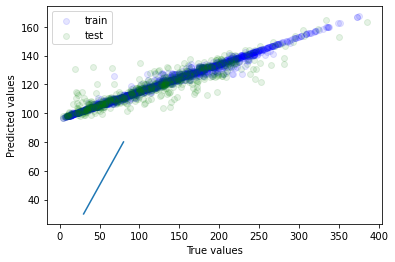

In [172]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_bulk_train, y_bulk_test = train_test_split(X, y_bulk_modulus, test_size=0.2, random_state=59)
gbr = GradientBoostingRegressor(n_estimators=2, max_depth=11)
gbr.fit(X_train,y_bulk_train,)


my_scorer(gbr,y_bulk_test,y_bulk_train)


## Nural Network

Train data:
RMSE =  29.173986801143673
MAE =  21.400781992986595
R2 =  0.8327071303415572
Test data:
RMSE =  28.95138675336579
MAE =  20.715258405586383
R2 =  0.8283850717428594


/opt/netapps/anaconda/2019.10/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



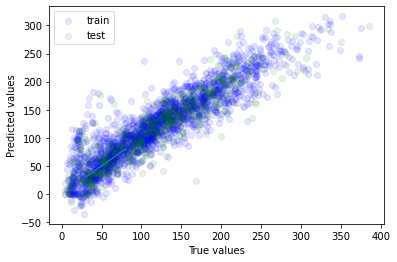

------------
Train data:
RMSE =  25.233891982241154
MAE =  18.851785012688023
R2 =  0.8748432301619853
Test data:
RMSE =  30.946837020935433
MAE =  22.26656095307068
R2 =  0.8039129754148584


/opt/netapps/anaconda/2019.10/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



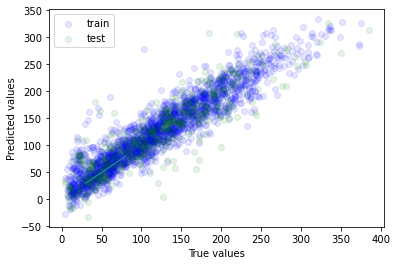

------------
Train data:
RMSE =  29.375416984691107
MAE =  21.261535401093795
R2 =  0.8303890264712426
Test data:
RMSE =  28.652570612807818
MAE =  21.120849384108187
R2 =  0.8319093703122461


/opt/netapps/anaconda/2019.10/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



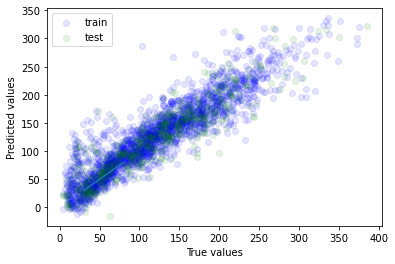

------------


In [158]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_bulk_train, y_bulk_test = train_test_split(X, y_bulk_modulus, test_size=0.2, random_state=59)


mlp = MLPRegressor(hidden_layer_sizes=(10,))
mlp.fit(X_train,y_bulk_train)
my_scorer(mlp,y_bulk_test,y_bulk_train)

print('------------')

mlp = MLPRegressor(hidden_layer_sizes=(100,))
mlp.fit(X_train,y_bulk_train)
my_scorer(mlp,y_bulk_test,y_bulk_train)

print('------------')


mlp = MLPRegressor(hidden_layer_sizes=(10,10,))
mlp.fit(X_train,y_bulk_train)
my_scorer(mlp,y_bulk_test,y_bulk_train)

print('------------')




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 31,241
Trainable params: 31,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 6ms/step - loss: 31929.9609 - val_loss: 6883.2480
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 5238.8589 - val_loss: 3850.3108
Epoch 3/100
155/155 [============

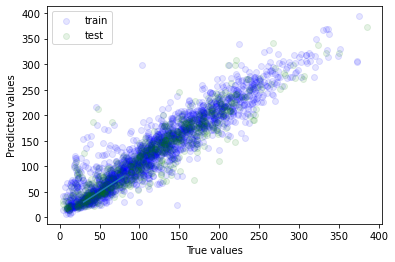

In [159]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation  # Import Activation separately

model = Sequential([
    Dense(150, activation='selu', input_shape=(X_train.shape[1],)),  
    Dense(50, activation='selu'),  
    Dense(20, activation='selu'),  
    Dense(1,activation="linear")  
])

model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)
model.fit(x=X_train,y=y_bulk_train,batch_size=10,epochs=100,callbacks=[early_stop], validation_split=0.25,validation_data=(X_test, y_bulk_test))

my_scorer(model,y_bulk_test,y_bulk_train)

# Plotting 

In [160]:
df_features["formula"] = df["formula"]

import plotly.express as px
import plotly.graph_objects as go

reference_line = go.Scatter(
    x=[0, 400],
    y=[0, 400],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    df_features, 
    x="shear_modulus", 
    y="shear_modulus_predicted", 
    hover_name="formula", 
    color="S_percentage_error", 
    color_continuous_scale=px.colors.sequential.Bluered,
)

fig.add_trace(reference_line)
fig.show()

In [161]:
df_features

,atomic_number_feat_1,atomic_number_feat_2,atomic_number_feat_3,atomic_number_feat_4,atomic_weight_feat_1,atomic_weight_feat_2,atomic_weight_feat_3,atomic_weight_feat_4,period_number_feat_1,period_number_feat_2,...,Gilman_electron_density,outer_shell_electron_density,composition,bulk_modulus,shear_modulus,bulk_modulus_predicted,B_percentage_error,shear_modulus_predicted,S_percentage_error,formula
0,123.500000,221,13,78,306.110770,558.258461,26.981539,195.08000,10.500000,15,...,0.415014,0.276676,Al1 Pt3,225.230461,91.197748,211.718137,5.999333,81.090833,11.082417,AlPt3
1,45.500000,9,25,41,101.391240,16.969720,54.938050,92.90638,6.500000,3,...,0.631474,0.236803,Mn2 Nb1,232.696340,74.590157,218.117146,6.265330,86.313301,15.716743,Mn2Nb
2,44.000000,56,8,72,105.244400,146.491200,15.999400,178.49000,5.000000,2,...,0.680451,0.680451,Hf1 O2,204.573433,98.564374,196.170982,4.107303,94.224677,4.402906,HfO2
3,82.500000,9,29,78,192.859000,4.442000,63.546000,195.08000,9.000000,6,...,0.414354,0.165742,Cu3 Pt1,159.312640,51.778816,152.875213,4.040751,54.941559,6.108178,Cu3Pt
4,57.000000,42,12,78,133.997500,122.165000,24.305000,195.08000,7.500000,3,...,0.266052,0.159631,Mg3 Pt1,69.637565,27.588765,69.641025,0.004969,32.509017,17.834259,Mg3Pt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,145.000000,378,12,78,358.208863,951.095000,24.305000,195.08000,12.333333,27,...,0.664107,0.531286,Mg1 As1 Pt5,181.857661,70.362793,164.010044,9.814058,58.865791,16.339604,MgAsPt5
2570,26.666667,33,6,39,60.273617,76.894850,12.011000,88.90585,3.666667,3,...,0.564697,0.611755,Y1 C1 Br1,22.970769,9.733656,31.193564,35.796775,17.667372,81.508085,YCBr
2571,16.333333,6,8,22,34.289523,15.881200,15.999400,47.88000,3.666667,0,...,0.824019,0.824019,Na1 Ti1 O2,98.358957,70.565034,107.671982,9.468406,68.041673,3.575937,NaTiO2
2572,27.333333,15,19,34,60.534767,39.861700,39.098300,78.96000,4.000000,0,...,0.374244,0.332661,K1 Cu1 Se1,34.111565,21.586576,37.564800,10.123354,20.716566,4.030332,KCuSe


In [167]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


reference_line = go.Scatter(
    x=[0, 400],
    y=[0, 400],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    df_features, 
    x="bulk_modulus", 
    y="bulk_modulus_predicted", 
    hover_name="formula", 
    color="B_percentage_error", 
    color_continuous_scale=px.colors.sequential.Bluered,
)

fig.add_trace(reference_line)
pio.write_image(fig, 'scatter_plot.png')

fig.show()

In [163]:
print(df_features.iloc[0])

atomic_number_feat_1            123.5
atomic_number_feat_2              221
atomic_number_feat_3               13
atomic_number_feat_4               78
atomic_weight_feat_1        306.11077
                              ...    
bulk_modulus_predicted     211.718137
B_percentage_error           5.999333
shear_modulus_predicted     81.090833
S_percentage_error          11.082417
formula                         AlPt3
Name: 0, Length: 158, dtype: object


In [164]:
df_features1 = df_features

In [165]:
# Assuming df_features is your DataFrame

# Filter out rows where 'B_percentage_error' is greater than 100%
df_features1 = df_features1[df_features1['B_percentage_error'] <= 100]

# Reset the index after removing rows
df_features1 = df_features1.reset_index(drop=True)

In [168]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


reference_line = go.Scatter(
    x=[0, 400],
    y=[0, 400],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    df_features1, 
    x="bulk_modulus", 
    y="bulk_modulus_predicted", 
    hover_name="formula", 
    color="B_percentage_error", 
    color_continuous_scale=px.colors.sequential.Bluered,
)

fig.add_trace(reference_line)
pio.write_image(fig, 'scatter_plot1.png')

fig.show()